In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math

In [2]:
def gen_custom_label(x):
    if math.sqrt(x[0]**2 + x[1]**2) < 10 :
        return 1
    return 0

def gen_custom_dataset(feat_num = 2, sample_num = 5000, max_value = 20, min_value = -20):
    data, labels = [], []
    for sam in range(sample_num):
        row = []
        for feat in range(feat_num):
            row.append(random.randint(min_value , max_value))
        data.append(row)
        labels.append(gen_custom_label(row))
    return np.asarray(data),np.asarray(labels) 

In [3]:
X, Y = gen_custom_dataset()
print(np.shape(X))
print(np.shape(Y))
# print(xtr,ytr)
print('number of samples ={} and number of features = {}:'.format(np.shape(X)[0], np.shape(X)[1]))
print('\nFirst 5 samples:\n', X[:5])
print('\nFirst 5 labels:', Y[:5])

(5000, 2)
(5000,)
number of samples =5000 and number of features = 2:

First 5 samples:
 [[ -2  11]
 [ 19   9]
 [-14   3]
 [ -1   4]
 [  8  20]]

First 5 labels: [0 0 0 1 0]


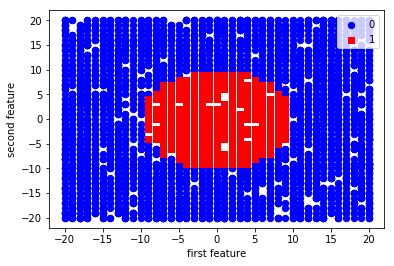

In [4]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.90,
                                                    random_state=1234,
                                                    stratify=Y)
print("num of train samples = {}".format(len(X_train)))
print("num of test samples = {}".format(len(X_test)))

num of train samples = 500
num of test samples = 4500


In [7]:
from sklearn.neural_network import MLPClassifier
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0) # classifier defination

# MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
#               alpha=0.0001, batch_size='auto', learning_rate='constant', 
#               learning_rate_init=0.001, power_t=0.5, max_iter=200, 
#               shuffle=True, random_state=None, tol=0.0001, verbose=False,
#               warm_start=False, momentum=0.9, nesterovs_momentum=True,
#               early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
#               beta_2=0.999, epsilon=1e-08)

training phase

In [8]:
classifier = nnclf.fit(X_train, y_train) # training
classifier

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [9]:
prediction = classifier.predict(X_test) # prediction or testing
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
print(prediction)
print(y_test)

[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]


In [11]:
np.mean(prediction == y_test)

0.97733333333333339

In [12]:
classifier.score(X_train, y_train)

1.0

In [13]:
classifier.score(X_test, y_test)

0.97733333333333339

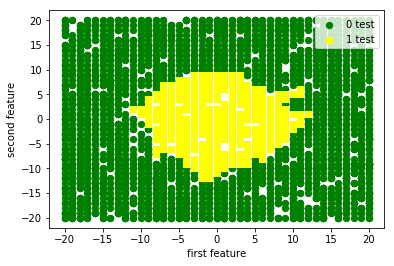

In [14]:

# plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
#             c='blue', s=40, label='0 train')
# plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
#             c='red', s=40, label='1 train ', marker='s')
plt.scatter(X_test[prediction == 0, 0], X_test[prediction == 0, 1], 
            c='green', s=40, label='0 test')
plt.scatter(X_test[prediction == 1, 0], X_test[prediction == 1, 1], 
            c='yellow', s=40, label='1 test', marker='s')
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc='upper right');



In [15]:
print(np.sum(prediction==1))
print(np.sum(prediction==0))
print(prediction.shape)

849
3651
(4500,)
